# Modelo para predição da qualidade de vinhos
## Problema de negócio
O controle de qualidade nos diferentes setores de manufatura pode se beneficiar muito
da aplicação de ferramentas de machine learning. Modelos preditivos podem trazer
ganho de tempo ao prever resultados de análises demoradas ou ainda obter ganhos de
processo, prevendo como parâmetros de controle podem impactar na qualidade do
produto e permitindo fazer correções a tempo de evitar a produção de produtos não-conformes. Ferramentas de machine learning podem também reduzir a necessidade de
análises de custo elevado por meio de aplicações capazes de predizer resultados a partir
dos resultados de análises mais simples.

## Dataset
Para desenvolver o projeto de machine learning foi escolhido um dataset disponível no kaggle (https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009) onde são listadas análises físico-químicas de amostras de vinho, especificamente
fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulfates, alcohol. Também estão disponíveis os resultados de uma análise sensorial feita por técnicos, onde as amostras de vinho foram classificadas na qualidade geral com notas de 0 a 10.

A proposta é prever os resultados das análises sensoriais a partir das demais análises físico-químicas, uma vez que essas análises físico-químicas são obrigatoriamente feitas para a certificação do vinho. Assim, as análises físico-químicas serão as variáveis de entrada do modelo, enquanto a análise sensorial será a variável de saída.

#### Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#### Importação do dataset

In [2]:
wine = pd.read_csv('winequality.csv')
wine.head(5)  #Para visualizar o dataset (primeiras linhas)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Exploração dos dados

In [3]:
wine.info()  # esse comando apresena as features e qual o tipo de cada uma

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
wine.isnull().sum() #este comando verifica a presença de dados faltantes no dataset

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Na sequência vamos entender o comportamento das variáves com algumas visualizações

<AxesSubplot:>

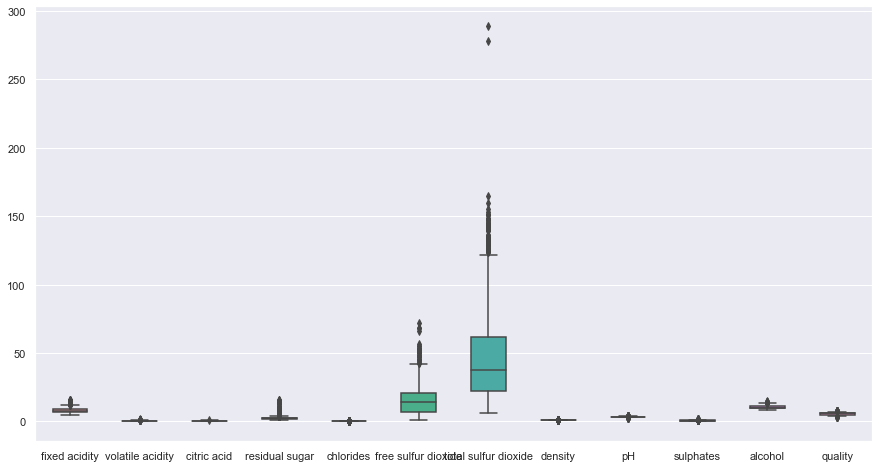

In [17]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
sns.boxplot(data=wine,width=0.5)

<AxesSubplot:xlabel='quality', ylabel='Count'>

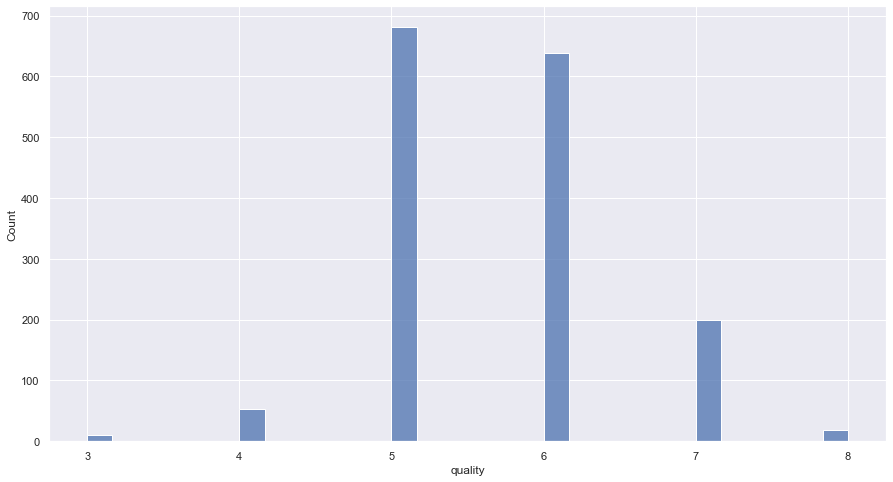

In [7]:
sns.histplot(data=wine['quality'])

### Construção do modelo
Para a construção do modelo as análises físico-químicas serão as variáveis de entrada do modelo, enquanto a análise sensorial será a variável de saída.

#### Seleção das variáveis
O conjunto de variáveis preditoras será denominado x.
E a variável resposta será denominada y.

In [5]:
X = wine.drop('quality', axis=1) #removendo a variável 'quality' para ficarmos apenas com as variáveis preditoras.
X.head(5) 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [6]:
y = wine['quality'] #seleção da variável resposta que é a feature 'quality' que é análise sensorial do vinho
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

#### Modelagem 
Como os dados da variável de saída são categóricos (notas de 0 a 10 apesar de ser um valor numérico não é uma variável contínua), para resolver o problema podem ser utilizados algoritmos de classificação que são tipicamente aplicados onde as variáveis preditivas são numéricas e a variável resposta é categórica.

No caso, foi escolhido utilizar o algoritmo de redes neurais para classificação.

In [7]:
#dividindo os dados em conjunto de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1119, 11)
(480, 11)
(1119,)
(480,)


In [8]:
#Padronizando os dados
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()  
scaler.fit(X_train)  
Xs_train = scaler.transform(X_train)  
Xs_test = scaler.transform(X_test)  



In [30]:
#treinamento da rede neural
from sklearn.neural_network import MLPClassifier
rede = MLPClassifier(hidden_layer_sizes=(150,50,10),
                     random_state=1,
                     max_iter=10000,
                     solver='lbfgs').fit(Xs_train, y_train)

In [31]:
y_pred = rede.predict(Xs_test)
y_pred_train = rede.predict(Xs_train)
y_pred_train.shape

(1119,)

#### Avaliação do modelo

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Acurácia conjunto de teste: %s" %accuracy_score(y_pred, y_test))
print("Acurácia conjunto de treino: %s" %accuracy_score(y_pred_train, y_train))

[[  0   1   0   0   0   0]
 [  1   2   9   6   1   0]
 [  2   7 151  49   8   0]
 [  3   2  34 121  14   1]
 [  0   0   6  28  25   5]
 [  0   0   0   1   2   1]]
Acurácia conjunto de teste: 0.625
Acurácia conjunto de treino: 1.0


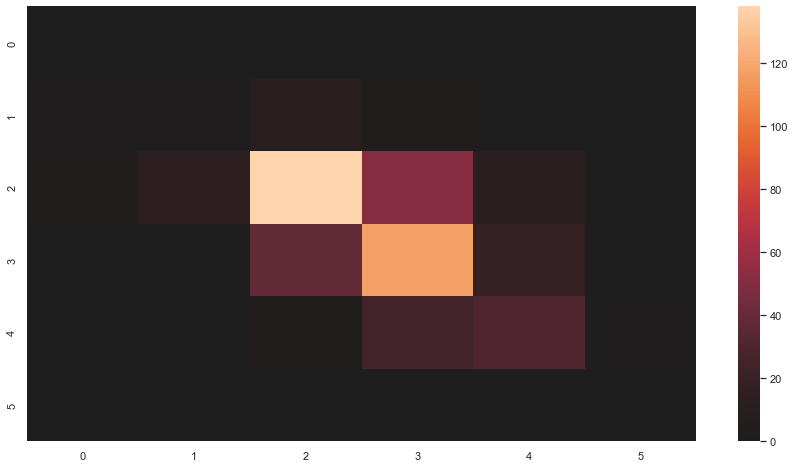

In [29]:
sns.heatmap(cm, center=True)
plt.show()

A análise da matrix de confusão mostra que apesar da maioria das classificações estarem corretas (diagonal), exeistem classificações incorretas especialmente para os valores 2 e 3.

Na sequência vamos plotar uma matriz que evidencia os erros para assim entender o comportamento do modelo.

In [21]:
soma_linha = cm.sum(axis=1, keepdims=True)
norm_cm = cm / soma_linha

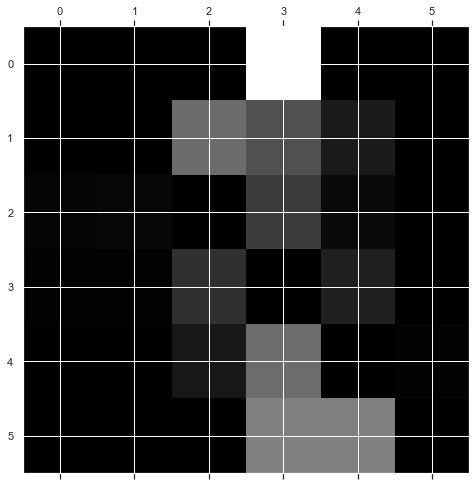

In [25]:
np.fill_diagonal(norm_cm, 0)
plt.matshow(norm_cm, cmap=plt.cm.gray)
plt.show()

Para reduzir os erros vamos selecionar um número menor de features, baseado naquelas features que estão mais relacionadas à análise sensorial do vinho.

In [34]:
Xn = X.drop(['fixed acidity', 'citric acid', 'residual sugar', 'density'], axis=1)
Xn.head()

,volatile acidity,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,0.70,0.076,11.0,34.0,3.51,0.56,9.4
1,0.88,0.098,25.0,67.0,3.20,0.68,9.8
2,0.76,0.092,15.0,54.0,3.26,0.65,9.8
3,0.28,0.075,17.0,60.0,3.16,0.58,9.8
4,0.70,0.076,11.0,34.0,3.51,0.56,9.4


In [53]:
from sklearn.model_selection import train_test_split
xn_train, xn_test, y_train, y_test = train_test_split(xn, y, test_size=0.30)
print(xn_train.shape)
print(y_train.shape)

(1119, 7)
(1119,)
